# 회귀 트리

* 사이킷런의 결정 트리 및 결정 트리 기반의 앙상블 알고리즘은 분류 뿐만 아니라 회귀도 가능합니다.
* 이는 트리가 **CART(Classification and Regression Tree)** 를 기반으로 만들어 졌기 때문입니다.
* CART는 분류 뿐만 아니라 회귀도 가능한 트리 분할 알고리즘입니다. 
* CART회귀 트리는 분류와 유사하게 분할을 하며, 분할 기준은 RSS가 최소가 될 수 있는 기준을 찾아서 분할 됩니다. 
* 최종 분할이 완료 된 후에 각 분할 영역에 있는 데이터 결정 값들의 평균 값으로 학습/예측합니다. 


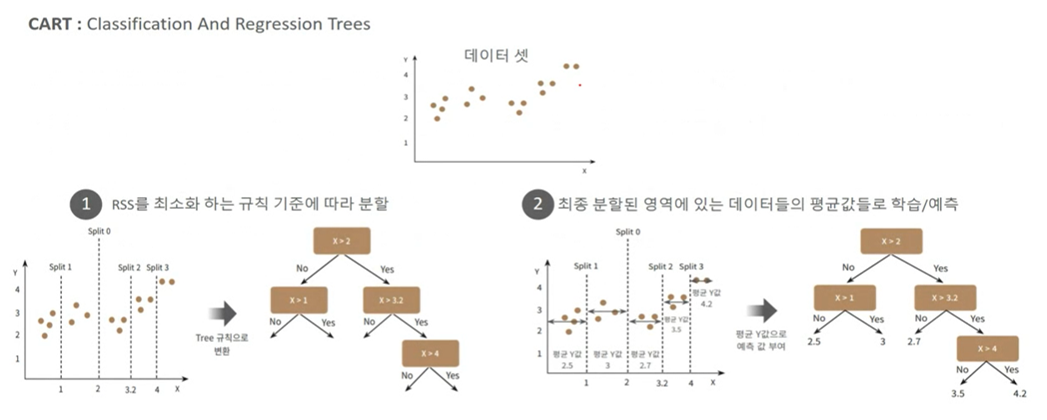

## 회귀 트리의 오버 피팅

* 회귀 트리 역시 복잡한 트리 구조를 가질 경우 오버 피팅되기 쉽습니다. 
* 트리의 크기와 노드 개수의 제한 등의 방법을 통해 오버 피팅을 개선합니다. 
* 하이퍼파라미터의 개수가 많으므로 CV와 함께 사용해서 튜닝합니다. 

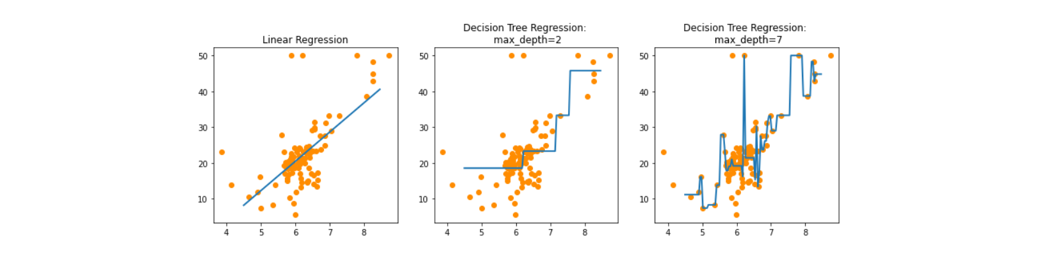

## 사이킷런의 회귀 트리 지원

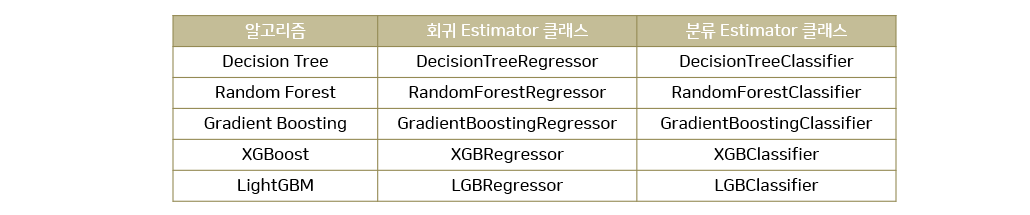

---

## 데이터 로딩

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF =

In [ ]:
# PRICE 컬럼으로 DataFrame에 추가함. 



[데이터 속성]
* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

## EDA

In [ ]:
#통계 정보


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# price와 상관관계가 높은 피처들 탐색


> LSTAT, RM,PTRATIO가 PRICE와 상관관계가 높음<br>
하위계층의 비율, 방의 개수, 교사와 학생수 비율

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)

# lm_features = ['LSTAT','RM','PTRATIO','INDUS','NOX','ZN','AGE','RAD']
lm_features = ['LSTAT','RM','PTRATIO','INDUS','NOX','B','DIS','CHAS']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

In [ ]:
#레이블의 분포


In [ ]:
#레이블의 분포


<div class="alert alert-block" style="background-color:#8FBDD3">
<font size="3em" style="font-weight:bold;color:#3f8dbf;"></font>
트리계열은 데이터 스케일링의 필요성이 다소 적으므로 스케일링 과정은 패스한다.  <br>
</div> 

## 모델 학습: 교차검증 + 랜덤포레스트

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0, n_estimators=1000)

#score:neg_mean_squared_error
#cv:5개


neg_mse_scores = cross_val_score(    )


In [ ]:
rmse_scores  = np.sqrt(-1 * neg_mse_scores)

avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [ ]:
# 함수 생성함


## 모델학습:회귀트리클래스 모두사용

## 변수 중요도

In [ ]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)


---